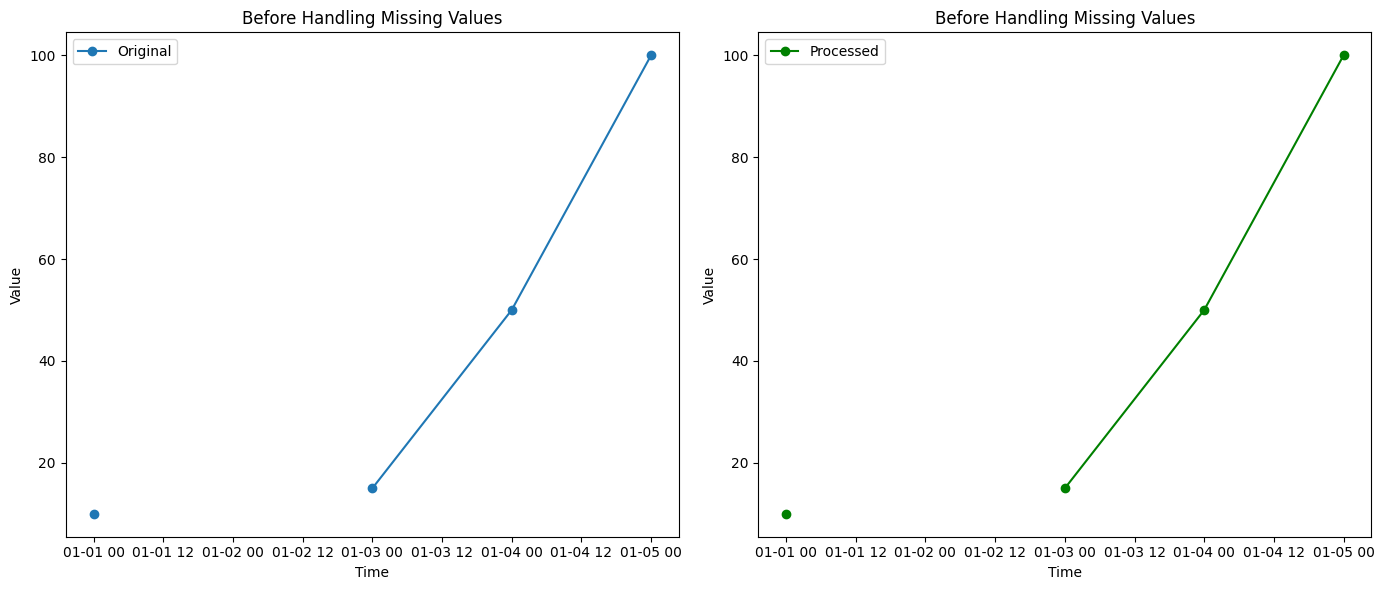

ValueError: Invalid method. Choose 'linear', 'time', or 'polynomial'.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

class TimeSeriesHandler:
    def __init__(self, data, time_col, value_col):
        """
        Initialize the TimeSeriesHandler with data.
        :param data: A pandas DataFrame or dictionary.
        :param time_col: Name of the time column.
        :param value_col: Name of the value column.
        """
        if isinstance(data, dict):
            data = pd.DataFrame(data)
        self.df = data.copy()
        self.time_col = time_col
        self.value_col = value_col
        self.df[time_col] = pd.to_datetime(self.df[time_col])
        self.df.set_index(time_col, inplace=True)

    def clean_missing_values(self, method="linear"):
        """
        Fill missing values using interpolation.
        :param method: Interpolation method ('linear', 'time', 'polynomial', etc.).
        """
        if method in ["linear", "time"]:
            self.df[self.value_col] = self.df[self.value_col].interpolate(method=method)
        elif method == "polynomial":
            self.df[self.value_col] = self.df[self.value_col].interpolate(method="polynomial", order=2)
        else:
            raise ValueError("Invalid method. Choose 'linear', 'time', or 'polynomial'.")

    def remove_outliers(self, z_thresh=3):
        """
        Remove outliers based on the Z-score method.
        :param z_thresh: Z-score threshold to detect outliers.
        """
        z_scores = (self.df[self.value_col] - self.df[self.value_col].mean()) / self.df[self.value_col].std()
        self.df = self.df[np.abs(z_scores) < z_thresh]

    def resample_data(self, freq="D", agg_func="mean"):
        """
        Resample the data to a different frequency.
        :param freq: Resampling frequency (e.g., 'D', 'W', 'M').
        :param agg_func: Aggregation function ('mean', 'sum', etc.).
        """
        self.df = self.df.resample(freq).agg({self.value_col: agg_func})

    def scale_data(self, method="minmax"):
        """
        Scale the data using Min-Max scaling or Standard scaling.
        :param method: Scaling method ('minmax' or 'standard').
        """
        scaler = MinMaxScaler() if method == "minmax" else StandardScaler()
        self.df[self.value_col] = scaler.fit_transform(self.df[[self.value_col]])

    def smooth_data(self, window=3):
        """
        Smooth the data using a rolling window average.
        :param window: Size of the rolling window.
        """
        self.df[self.value_col] = self.df[self.value_col].rolling(window=window, min_periods=1).mean()

    def show_data(self):
        """Return the processed DataFrame."""
        return self.df

# Visualization function
def plot_data_before_after(df_before, df_after, column, title_before, title_after, x_label, y_label):
    plt.figure(figsize=(14, 6))

    # Before cleaning missing values
    plt.subplot(1, 2, 1)
    plt.plot(df_before.index, df_before[column], marker='o', label="Original")
    plt.title(title_before)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # After cleaning missing values
    plt.subplot(1, 2, 2)
    plt.plot(df_after.index, df_after[column], marker='o', label="Processed", color='green')
    plt.title(title_after)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example Usage
data = {
    "timestamp": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
    "value": [10, np.nan, 15, 50, 100]
}

handler = TimeSeriesHandler(data, time_col="timestamp", value_col="value")

# Save the original DataFrame for visualization
df_before = handler.df.copy()

# Visualize before handling missing values
plot_data_before_after(
    df_before=df_before,
    df_after=df_before,  # No changes yet, so both are the same
    column="value",
    title_before="Before Handling Missing Values",
    title_after="Before Handling Missing Values",
    x_label="Time",
    y_label="Value"
)

# Clean missing values
handler.clean_missing_values(method="interpolate")

# Visualize after handling missing values
df_after = handler.show_data()
plot_data_before_after(
    df_before=df_before,
    df_after=df_after,
    column="value",
    title_before="Before Handling Missing Values",
    title_after="After Handling Missing Values",
    x_label="Time",
    y_label="Value"
)

# Proceed with other steps like removing outliers, resampling, etc.



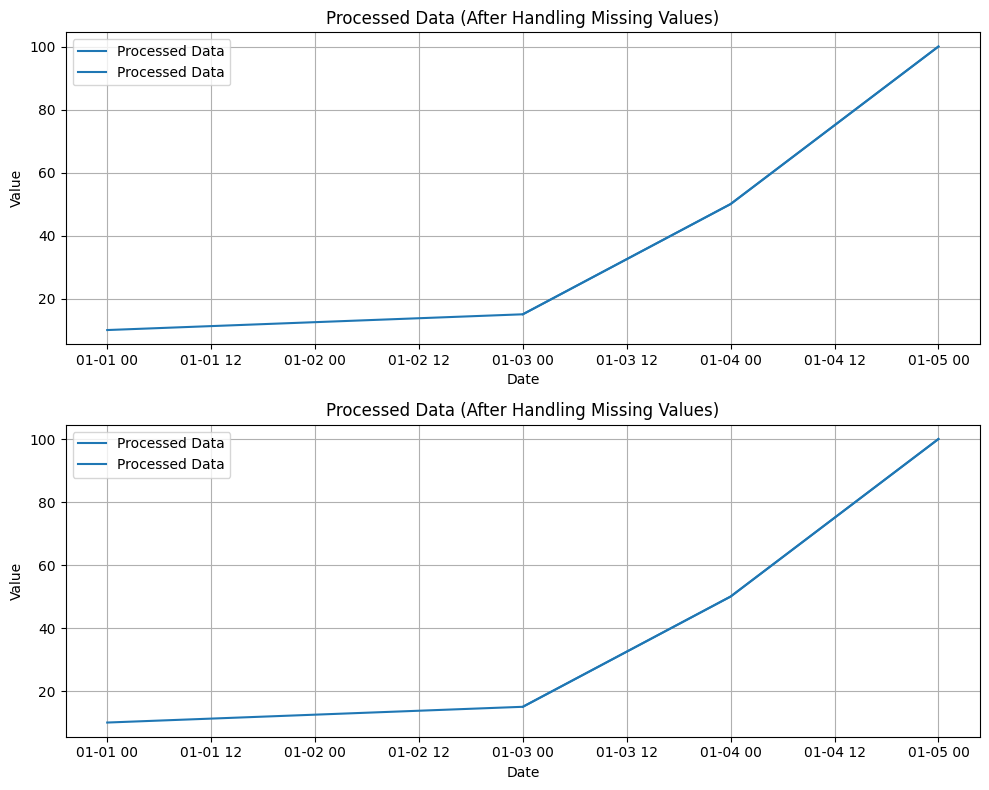

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class TimeSeriesHandler:
    def __init__(self, data, time_col, value_col):
        """
        Initialize the TimeSeriesHandler with data.
        :param data: A pandas DataFrame or dictionary.
        :param time_col: Name of the time column.
        :param value_col: Name of the value column.
        """
        if isinstance(data, dict):
            data = pd.DataFrame(data)
        self.df = data.copy()
        self.time_col = time_col
        self.value_col = value_col
        self.df[time_col] = pd.to_datetime(self.df[time_col])
        self.df.set_index(time_col, inplace=True)

    def clean_missing_values(self, method="ffill"):
        if method == "ffill":
            self.df[self.value_col] = self.df[self.value_col].fillna(method="ffill")
        elif method == "bfill":
            self.df[self.value_col] = self.df[self.value_col].fillna(method="bfill")
        elif method == "interpolate":
            self.df[self.value_col] = self.df[self.value_col].interpolate(method="linear")
        else:
            raise ValueError("Invalid method. Choose 'ffill', 'bfill', or 'interpolate'.")


    def remove_outliers(self, z_thresh=3):
        """
        Remove outliers based on the Z-score method.
        :param z_thresh: Z-score threshold to detect outliers.
        """
        z_scores = (self.df[self.value_col] - self.df[self.value_col].mean()) / self.df[self.value_col].std()
        self.df = self.df[np.abs(z_scores) < z_thresh]

    def resample_data(self, freq="D", agg_func="mean"):
        """
        Resample the data to a different frequency.
        :param freq: Resampling frequency (e.g., 'D', 'W', 'M').
        :param agg_func: Aggregation function ('mean', 'sum', etc.).
        """
        self.df = self.df.resample(freq).agg({self.value_col: agg_func})

    def scale_data(self, method="minmax"):
        """
        Scale the data using Min-Max scaling or Standard scaling.
        :param method: Scaling method ('minmax' or 'standard').
        """
        scaler = MinMaxScaler() if method == "minmax" else StandardScaler()
        self.df[self.value_col] = scaler.fit_transform(self.df[[self.value_col]])

    def smooth_data(self, window=3):
        """
        Smooth the data using a rolling window average.
        :param window: Size of the rolling window.
        """
        self.df[self.value_col] = self.df[self.value_col].rolling(window=window, min_periods=1).mean()

    def show_data(self):
        """Return the processed DataFrame."""
        return self.df

    def plot_data(self, title="Time Series Data", xlabel="Date", ylabel="Value", ax=None):
        """Plot the time series data."""
        ax.plot(self.df.index, self.df[self.value_col], label='Processed Data', color='tab:blue')
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.legend()

# Example Usage:
data = {
    "timestamp": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
    "value": [10, np.nan, 15, 50, 100]
}

handler = TimeSeriesHandler(data, time_col="timestamp", value_col="value")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: Original Data (Before Missing Value Handling)
handler.plot_data(title="Original Data (Before Handling Missing Values)", ax=axs[0])

# Clean missing values (using interpolation method)
handler.clean_missing_values(method="interpolate")

# Plot 2: Processed Data (After Missing Value Handling)
handler.plot_data(title="Processed Data (After Handling Missing Values)", ax=axs[0])

# Reinitialize with the original data for comparison
handler = TimeSeriesHandler(data, time_col="timestamp", value_col="value")

# Plot 3: Original Data (Before Handling Missing Values) - Again for comparison
handler.plot_data(title="Original Data (Before Handling Missing Values)", ax=axs[1])

# Clean missing values again for processed plot
handler.clean_missing_values(method="interpolate")

# Plot 4: Processed Data (After Missing Value Handling) - Again for comparison
handler.plot_data(title="Processed Data (After Handling Missing Values)", ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.show()